<a href="https://colab.research.google.com/github/atulram/Tensorflow-2.0/blob/master/Linear_Regression_Tensorflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Linear Regression using Tensorflow 2.0

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

TensorFlow 2.x selected.


In [0]:
def make_data(m, c, stddev=0.05, n = 100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape = (n,), stddev = stddev)
  y = m*x + c + noise
  return x, y

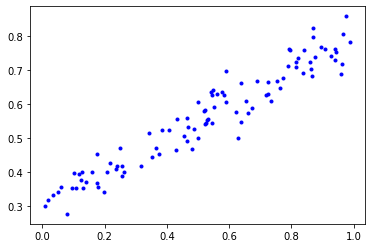

In [5]:
x_train, y_train = make_data(m = 0.5, c = 0.3, stddev = 0.04)
plt.plot(x_train, y_train, 'b.')

In [24]:
rand1, rand2 = tf.random.uniform(shape = (2,))

# m = tf.Variable(rand1)
# c = tf.Variable(rand2)

m = tf.Variable(0.)
c = tf.Variable(0.)

print(f"Initial m: {m.numpy()} and c: {c.numpy()}")

Initial m: 0.0 and c: 0.0


In [0]:
def predict(x_train):
  return m*x_train + c

In [0]:
def loss_finder(y_pred, y_true):
  # error = sum((y_pred-y_true)**2)/len(y_pred) # manual method
  error = tf.reduce_mean(tf.square(y_pred-y_true))
  return error

In [0]:
def plot_fit():
  plt.plot(x_train, y_train, 'b.')
  plt.plot(x_train, predict(x_train))
  plt.xlabel("X")
  plt.ylabel("Y")


Initial loss is 0.33739781379699707


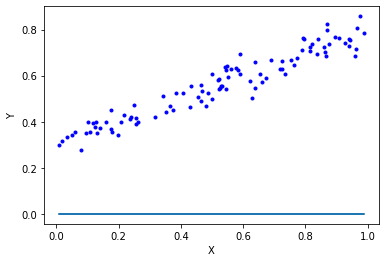

In [25]:
print(f"Initial loss is {loss_finder(predict(x_train), y_train)}")
plot_fit()

In [26]:
learning_rate = 0.02
epoch = 1500

history = []
for i in range(1, epoch+1):
  with tf.GradientTape() as tape:
    y_pred = predict(x_train)
    loss = loss_finder(y_pred, y_train)
  history.append((m.numpy(), c.numpy(), loss.numpy()))
  gradients = tape.gradient(loss, [m, c])
  m.assign_sub(gradients[0] * learning_rate)
  c.assign_sub(gradients[1] * learning_rate)

  if(i%50==0 or i==1):
    
    print(f"After epoch {i}:  Loss: {loss.numpy()} -- m: {m.numpy()} -- c: {c.numpy()}")



After epoch 1:  Loss: 0.33739781379699707 -- m: 0.013397864066064358 -- c: 0.022497061640024185
After epoch 50:  Loss: 0.007291765417903662 -- m: 0.2583613991737366 -- c: 0.39418351650238037
After epoch 100:  Loss: 0.00464828684926033 -- m: 0.29975491762161255 -- c: 0.4087742567062378
After epoch 150:  Loss: 0.00398033345118165 -- m: 0.32322749495506287 -- c: 0.39827632904052734
After epoch 200:  Loss: 0.003465799381956458 -- m: 0.3430474102497101 -- c: 0.38736191391944885
After epoch 250:  Loss: 0.0030642016790807247 -- m: 0.3604940176010132 -- c: 0.3776041567325592
After epoch 300:  Loss: 0.0027507252525538206 -- m: 0.37590354681015015 -- c: 0.36897510290145874
After epoch 350:  Loss: 0.002506031421944499 -- m: 0.3895176649093628 -- c: 0.36135077476501465
After epoch 400:  Loss: 0.002315028803423047 -- m: 0.4015457034111023 -- c: 0.3546144962310791
After epoch 450:  Loss: 0.002165936166420579 -- m: 0.4121726155281067 -- c: 0.3486630618572235
After epoch 500:  Loss: 0.0020495585631579

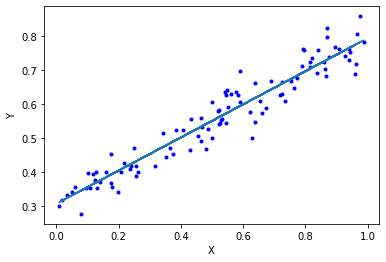

In [27]:
plot_fit()

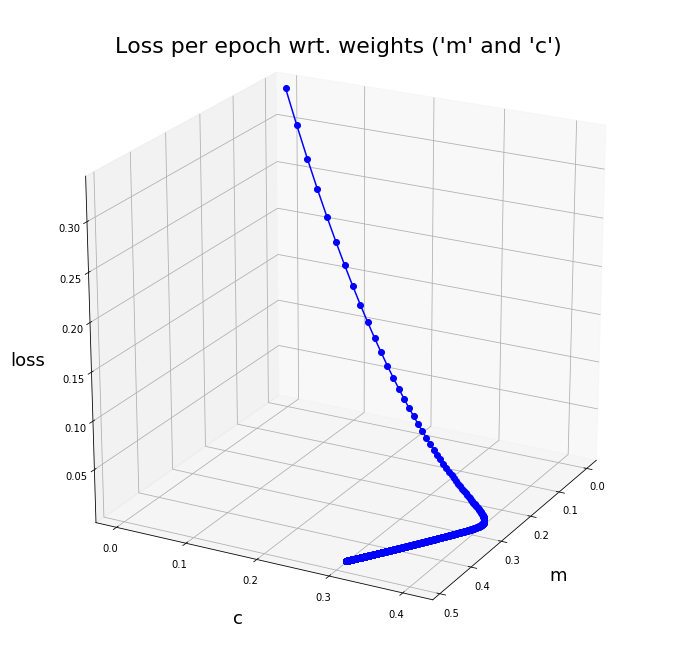

In [28]:
# ms = np.linspace(-0.3,0.3)
# cs = np.linspace(-0.3,0.3)
# m_mesh, c_mesh = np.meshgrid(ms, cs)
# zs = np.array([loss_finder(m,b) for (m,b) in zip(np.ravel(m_mesh), np.ravel(c_mesh))])
# z_mesh = zs.reshape(m_mesh.shape)

# fig = plt.figure(figsize=(12,12))
# ax1 = fig.add_subplot(111, projection='3d')
# ax1.plot_surface(m_mesh, c_mesh, z_mesh, color='b', alpha = 0.2)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot([h[0] for h in history],
         [h[1] for h in history],
         [h[2] for h in history],
         'blue', marker='o')

ax1.set_xlabel('m', fontsize=18, labelpad=20)
ax1.set_ylabel('c', fontsize=18, labelpad=20)
ax1.set_zlabel('loss', fontsize=18, labelpad=20)
ax1.set_title("Loss per epoch wrt. weights ('m' and 'c') ", fontsize=22,)
ax1.view_init(elev=22, azim=28)

